# Plotting Phase fraction vs T

## Libraries

In [66]:
from pycalphad import Database, equilibrium, variables as v
import matplotlib.pyplot as plt
import numpy as np
from pycalphad.plot.utils import phase_legend
import pandas as pd

### Defining file paths for database

In [67]:
# Set the file path
# dbf_diretory = r'C:\PythonCode\Environments\Calphad\pycalphad\pycalphad codes\1 - databases\\'
dbf_diretory = r'C:\PythonCode\Environments\Calphad\pycalphad\pycalphad codes\1 - databases\Mod Sc-Zr\\'

### Load database

In [68]:
# dbf = Database(dbf_diretory + 'COST507_Sundman.tdb') #Aluminum database good for Zr
# dbf = Database(dbf_diretory + 'mc_al_v2.032.pycalphad.tdb') #2018 version addition of Sc (GOOD)
# dbf = Database(dbf_diretory + 'mc_al_v2.035.tdb') #Matcalc 2021 Aluminum database
# dbf = Database(dbf_diretory + 'mc_al_v2037.tdb') #Matcalc 2025 version

# -- hybrid databases --
dbf = Database(dbf_diretory + 'MOD_mc_al_v2.032_ZR_COST507_GOOD.tdb') #Describes basic Al3Zr
# dbf = Database(dbf_diretory + 'MOD_mc_al_v2.032_ZR_COST507_D023AL3ZR.tdb') #Describes more complex Al3Zr with phase type D023
                                                                             # and 75% Al and 25% of either Zr, Sc, or Cu  

### Determine phases

In [69]:
# phases = list(dbf.phases.keys())
# -- Al-Sc --
# phases = ['LIQUID', 'FCC_A1', 'HCP_A3', 'BCC_A2', 'AL3SC', 'AL2SC', 'ALSC', 'SC2AL'] # Scandium

# -- Al-Zr --
# phases = ['LIQUID', 'FCC_A1','HCP_A3','BCC_A2',
#           'ALZR','ALZR2','ALZR3','AL2ZR','AL2ZR3','AL3ZR','AL3ZR2','AL3ZR4','AL3ZR5','AL4ZR5',]

# -- Al-Zr-Sc --
# phases = ['LIQUID', 'FCC_A1','HCP_A3','BCC_A2',
#           'ALZR','ALZR2','ALZR3','AL2ZR','AL2ZR3','AL3ZR','AL3ZR2','AL3ZR4','AL3ZR5','AL4ZR5',
#           'AL3SC', 'AL2SC', 'ALSC', 'SC2AL']

# -- Al-Zr-Mg-Mn-Sc --
phases = ['LIQUID','FCC_A1','BCC_A2','HCP_A3',
           'AL3SC','ALSC','AL2SC','SC2AL',
           'ALZR','ALZR2','ALZR3','AL2ZR','AL2ZR3','AL3ZR2','AL3ZR4','AL3ZR5','AL4ZR5','AL3ZR',
           'AL4MN','AL6MN','AL8MN5_D810','AL11MN4','AL12MN',
           'ALMGMN_T','BETA_AL3MG2','G_AL12MG17']
          
# phases

In [80]:
# mass_fracs = {v.W('ZR'): 0.8/100, v.W('SC'): 0.4/100} #AL-ZR-SC
# mass_fracs = {v.W('ZR'): 1.4/100} #AL-ZR-SC


# mass_fracs = {v.W('ZR'): 0.8/100, v.W('MG'): 2.2/100, v.W('MN'): 4.0/100} 
mass_fracs = {v.W('ZR'): 0.8/100, v.W('MG'): 2.2/100, v.W('MN'): 4.0/100, v.W('SC'): 0.2/100} #Lower
# mass_fracs = {v.W('ZR'): 1.1/100, v.W('MG'): 2.8/100, v.W('MN'): 4.5/100, v.W('SC'): 0.4/100} #Upper

conds = v.get_mole_fractions(mass_fracs, 'AL', dbf)

conds[v.T] = (523.15, 1473.15, 0.5) # Kelvin
conds[v.P] = 1e5 # Pa
conds[v.N] = 1

# eq = equilibrium(dbf, ['AL','ZR','MG','MN','VA'], phases, conds) #Z301
eq = equilibrium(dbf, ['AL', 'ZR','MG','MN','SC','VA'], phases, conds)


print(eq)

<xarray.Dataset> Size: 1MB
Dimensions:    (N: 1, P: 1, T: 1901, X_MG: 1, X_MN: 1, X_SC: 1, X_ZR: 1,
                vertex: 6, component: 5, internal_dof: 6)
Coordinates:
  * N          (N) float64 8B 1.0
  * P          (P) float64 8B 1e+05
  * T          (T) float64 15kB 523.1 523.6 524.1 ... 1.473e+03 1.473e+03
  * X_MG       (X_MG) float64 8B 0.02503
  * X_MN       (X_MN) float64 8B 0.02014
  * X_SC       (X_SC) float64 8B 0.00123
  * X_ZR       (X_ZR) float64 8B 0.002425
  * vertex     (vertex) int64 48B 0 1 2 3 4 5
  * component  (component) <U2 40B 'AL' 'MG' 'MN' 'SC' 'ZR'
Dimensions without coordinates: internal_dof
Data variables:
    NP         (N, P, T, X_MG, X_MN, X_SC, X_ZR, vertex) float64 91kB 0.8445 ...
    GM         (N, P, T, X_MG, X_MN, X_SC, X_ZR) float64 15kB -1.951e+04 ... ...
    MU         (N, P, T, X_MG, X_MN, X_SC, X_ZR, component) float64 76kB -1.6...
    X          (N, P, T, X_MG, X_MN, X_SC, X_ZR, vertex, component) float64 456kB ...
    Y          (N, P, T,

In [81]:
phases = sorted(set(eq.Phase.values.flatten()) - {''})
phase_handles, phasemap = phase_legend(phases)
print (phases)

[np.str_('AL3SC'), np.str_('AL3ZR'), np.str_('AL6MN'), np.str_('FCC_A1'), np.str_('LIQUID')]


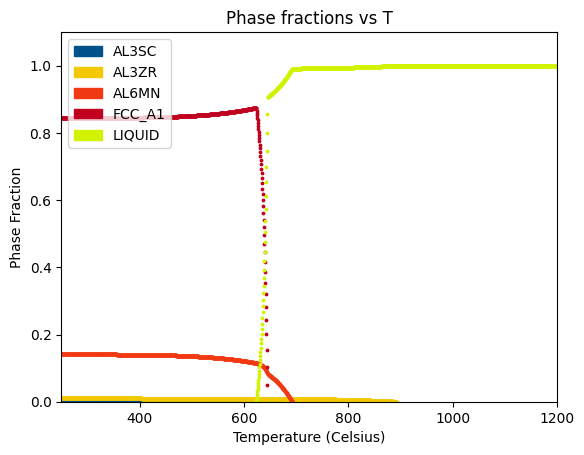

In [82]:
plt.gca().set_title('Phase fractions vs T')
plt.gca().set_xlabel('Temperature (Celsius)')
plt.gca().set_ylabel('Phase Fraction')
plt.gca().set_ylim((0,1.1))
plt.gca().set_xlim((523.15-273.15, 1473.15-273.15))

for name in phases:
    plt.scatter(eq.T.broadcast_like(eq.NP)-273.15, eq.NP.where(eq.Phase == name), color=phasemap[name], s=3)
plt.gca().legend(phase_handles, phases, loc='upper left')

### Extracting solute concentration in FCCA_1

In [83]:
# FCC_A1 fraction vs T
fcc_frac = eq.NP.where(eq.Phase == 'FCC_A1').max(dim='vertex', skipna=True).squeeze()

# Find index of maximum FCC_A1 fraction
max_idx = np.nanargmax(fcc_frac.values)
max_frac = fcc_frac.values[max_idx]
max_T = eq['T'][max_idx].item()

# FCC_A1 composition at that T
X_fcc_per_comp = (
    eq.X.where(eq.Phase == 'FCC_A1')
      .max(dim='vertex', skipna=True)
      .isel(T=max_idx)
)

comps = list(X_fcc_per_comp['component'].values)
mole_fracs = {comp: float(X_fcc_per_comp.sel(component=comp).item()) for comp in comps}
solute_mask = [c for c in comps if c != 'AL']
total_solute = float(X_fcc_per_comp.sel(component=solute_mask).sum(dim='component').item())

print(f"Max FCC_A1 fraction: {max_frac:.6%} at T = {max_T:.2f} K")
print("FCC_A1 composition (mole fraction) at that T:")
for comp, xf in mole_fracs.items():
    print(f"  {comp}: {xf:.6g}")
print(f"Total solute (1 - AL): {total_solute:.6g}")


Max FCC_A1 fraction: 87.490757% at T = 896.15 K
FCC_A1 composition (mole fraction) at that T:
  AL: 0.965838
  MG: 0.0286118
  MN: 0.00421279
  SC: 0.000932902
  ZR: 0.000404212
Total solute (1 - AL): 0.0341617


In [84]:
# --- Index of minimum temperature in your sweep ---
end_idx = 0   # since np.linspace usually goes high → low, adjust if reversed
end_T = eq['T'][end_idx].item()

# --- FCC_A1 fraction at min T ---
fcc_end_frac = (
    eq.NP.where(eq.Phase == 'FCC_A1')
    .max(dim='vertex', skipna=True)
    .isel(T=end_idx)
    .item()
)

# --- AL3ZR composition at min T ---
X_al3zr_end = (
    eq.X.where(eq.Phase == 'AL3ZR')
      .max(dim='vertex', skipna=True)
      .isel(T=end_idx)
)

comps = list(X_al3zr_end['component'].values)
mole_fracs = {comp: float(X_al3zr_end.sel(component=comp).item()) for comp in comps}
solute_mask = [c for c in comps if c != 'AL']
total_solute = float(X_al3zr_end.sel(component=solute_mask).sum(dim='component').item())

# --- Print results ---
print(f"End of solidification (min T) = {end_T:.2f} K")
print(f"FCC_A1 fraction at that T: {fcc_end_frac:.6%}")
print("AL3ZR composition (mole fraction) at that T:")
for comp, xf in mole_fracs.items():
    print(f"  {comp}: {xf:.6g}")
print(f"Total solute (1 - AL): {total_solute:.6g}")


End of solidification (min T) = 523.15 K
FCC_A1 fraction at that T: 84.446378%
AL3ZR composition (mole fraction) at that T:
  AL: 0.75
  MG: 0
  MN: 0
  SC: 0
  ZR: 0.25
Total solute (1 - AL): 0.25


In [85]:
# --- Index of minimum temperature in your sweep ---
end_idx = 0   # since np.linspace usually goes high → low, adjust if reversed
end_T = eq['T'][end_idx].item()

# --- FCC_A1 fraction at min T ---
fcc_end_frac = (
    eq.NP.where(eq.Phase == 'FCC_A1')
    .max(dim='vertex', skipna=True)
    .isel(T=end_idx)
    .item()
)

# --- AL3ZR composition at min T ---
X_al3zr_end = (
    eq.X.where(eq.Phase == 'FCC_A1')
      .max(dim='vertex', skipna=True)
      .isel(T=end_idx)
)

comps = list(X_al3zr_end['component'].values)
mole_fracs = {comp: float(X_al3zr_end.sel(component=comp).item()) for comp in comps}
solute_mask = [c for c in comps if c != 'AL']
total_solute = float(X_al3zr_end.sel(component=solute_mask).sum(dim='component').item())

# --- Print results ---
print(f"End of solidification (min T) = {end_T:.2f} K")
print(f"FCC_A1 fraction at that T: {fcc_end_frac:.6%}")
print("FCC_A1 composition (mole fraction) at that T:")
for comp, xf in mole_fracs.items():
    print(f"  {comp}: {xf:.6g}")
print(f"Total solute (1 - AL): {total_solute:.6g}")


End of solidification (min T) = 523.15 K
FCC_A1 fraction at that T: 84.446378%
FCC_A1 composition (mole fraction) at that T:
  AL: 0.970349
  MG: 0.0296432
  MN: 4.14481e-06
  SC: 1.96904e-06
  ZR: 1.51469e-06
Total solute (1 - AL): 0.0296509


### Export data to excel

In [86]:
import pandas as pd
import numpy as np

T_arr = eq.T.broadcast_like(eq.NP).values - 273.15  # Celsius
phase_arr = eq.Phase.values
frac_arr = eq.NP.values

unique_phases = sorted(set(phase_arr.flatten()) - {''})
data = {"Temperature (°C)": np.unique(T_arr)}

for ph in unique_phases:
    fractions = []
    for T in data["Temperature (°C)"]:
        mask = (T_arr == T) & (phase_arr == ph)
        if np.any(mask):
            fractions.append(frac_arr[mask].max())  # take max fraction at this T
        else:
            fractions.append(0)
    data[ph] = fractions

df = pd.DataFrame(data)
df["Sum of Phases"] = df[unique_phases].sum(axis=1)
df.to_excel("phase_fractions_correct_Celcius_Al.xlsx", index=False)

output_file = "phase_fractions_correct_Celcius_Al.xlsx"
df.to_excel(output_file, index=False)
print(f"Data successfully exported to {output_file}")


Data successfully exported to phase_fractions_correct_Celcius_Al.xlsx


In [77]:
# # Mask FCC_A1 in ZR composition
# X_ZR_FCCA1 = eq.X.where(eq.Phase == 'FCC_A1').sel(component='ZR')

# # Collapse vertex dimension, ignoring NaNs
# X_ZR_FCCA1_single = X_ZR_FCCA1.max(dim='vertex', skipna=True)

# print(X_ZR_FCCA1_single)


In [78]:
# X_ZR_vs_T = X_ZR_FCCA1_single.squeeze()  # remove N, P, X_SC, X_ZR singleton dims


In [79]:
# import matplotlib.pyplot as plt

# plt.plot(X_ZR_vs_T['T'], X_ZR_vs_T, label='ZR in FCC_A1')
# plt.xlabel('Temperature (K)')
# plt.ylabel('Mole Fraction ZR')
# plt.legend()
# plt.show()
